<a href="https://colab.research.google.com/github/Sarach-git/CS-SBU-eDataMining-MSc-2022/blob/400422066/submits/400422066/project_2/Apartment_rental_offers_in_Germany_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS-SBU-eDataMining-MSc-2022
Presented by Sara Charmchi  
Student ID : 400422066  

## Apartment rental offers in Germany
Rental offers scraped from Germany biggest real estate online plattform 
Dataset : [Apartment rental offers in Germany](https://www.kaggle.com/datasets/corrieaar/apartment-rental-offers-in-germany/code)



# Importing libraries

In [98]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import branca.colormap as cm
import zipfile
from scipy import stats
import urllib
from geopy.distance import geodesic
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

%matplotlib inline
from skimage.io import imread

# Loading Data

In [99]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"saracharmchi","key":"cd5bd2a72d556a3aac50896f2bdf8efd"}'}

In [100]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [101]:
!kaggle datasets download -d corrieaar/apartment-rental-offers-in-germany

apartment-rental-offers-in-germany.zip: Skipping, found more recently modified local copy (use --force to force download)


In [102]:
!ls

 apartment-rental-offers-in-germany.zip  'kaggle (1).json'   kaggle.json
 files					 'kaggle (2).json'   sample_data


In [103]:
zip_ref = zipfile.ZipFile('apartment-rental-offers-in-germany.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [104]:
df=pd.read_csv('/content/files/immo_data.csv')

In [105]:
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [107]:
df.shape

(268850, 49)

In [108]:
df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')

# Cleaning data

*   Removing irrelevant columns
*   Filling missing data
*   Detecting outliers
*   Dealing with non sence data
*   Reducing categorical data







In [109]:
df.isna().sum()/len(df)

regio1                      0.000000
serviceCharge               0.025698
heatingType                 0.166844
telekomTvOffer              0.121328
telekomHybridUploadSpeed    0.832546
newlyConst                  0.000000
balcony                     0.000000
picturecount                0.000000
pricetrend                  0.006814
telekomUploadSpeed          0.124077
totalRent                   0.150705
yearConstructed             0.212182
scoutId                     0.000000
noParkSpaces                0.653889
firingTypes                 0.211880
hasKitchen                  0.000000
geo_bln                     0.000000
cellar                      0.000000
yearConstructedRange        0.212182
baseRent                    0.000000
houseNumber                 0.264155
livingSpace                 0.000000
geo_krs                     0.000000
condition                   0.254748
interiorQual                0.419063
petsAllowed                 0.426160
street                      0.000000
s

In [110]:
df.columns[((df.isna().sum()/len(df)) > 0.50)]

Index(['telekomHybridUploadSpeed', 'noParkSpaces', 'heatingCosts',
       'energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice',
       'electricityKwhPrice'],
      dtype='object')

In [111]:
df = df.drop(columns=df.columns[((df.isna().sum()/len(df)) > 0.50)])
df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'newlyConst', 'balcony', 'picturecount', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'scoutId',
       'firingTypes', 'hasKitchen', 'geo_bln', 'cellar',
       'yearConstructedRange', 'baseRent', 'houseNumber', 'livingSpace',
       'geo_krs', 'condition', 'interiorQual', 'petsAllowed', 'street',
       'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat', 'geo_plz',
       'noRooms', 'thermalChar', 'floor', 'numberOfFloors', 'noRoomsRange',
       'garden', 'livingSpaceRange', 'regio2', 'regio3', 'description',
       'facilities', 'date'],
      dtype='object')

In [112]:
df.shape

(268850, 42)

In [113]:
df = df.drop(df[df['livingSpace'] == 0.0].index)
df.shape

(268775, 42)

In [114]:
df = df.drop(df[df['totalRent'] == 0.0].index)
df.shape

(268544, 42)

In [115]:
df = df.drop(df[df['baseRent'] == 0.0].index)
df.shape

(268470, 42)

In [116]:
df = df.drop(df[df['noRooms'] > 100].index)
df.shape


(268462, 42)

In [117]:
df = df.loc[~((df['livingSpace'] == 60) & (df['baseRentRange']< 30)),:]
df.shape

(263281, 42)

In [118]:
df.describe()

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange
count,256632.000000,263281.000000,261480.000000,230483.000000,2.236900e+05,207874.000000,2.632810e+05,207874.000000,2.632810e+05,263281.000000,263281.000000,263281.000000,263281.000000,159437.000000,213078.000000,167319.000000,263281.000000,263281.000000
mean,151.846982,9.800179,3.393378,28.812074,9.074140e+02,1966.506865,1.069981e+08,3.727195,6.984829e+02,74.659157,3.781671,37234.100710,2.637581,114.535827,2.124959,3.581273,2.577710,3.092718
std,311.337044,6.415461,1.966035,16.336040,3.358146e+04,47.135401,1.247700e+07,2.744813,1.974149e+04,257.404630,2.220350,27805.343642,1.096245,61.533471,3.666978,6.442359,0.942816,1.412622
min,0.000000,0.000000,-12.330000,1.000000,1.000000e+00,1000.000000,2.887174e+07,1.000000,1.000000e+00,1.000000,1.000000,852.000000,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000
25%,95.000000,6.000000,2.000000,10.000000,4.700000e+02,1950.000000,1.067174e+08,1.000000,3.390000e+02,54.000000,2.000000,9127.000000,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000
50%,135.000000,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111615e+08,3.000000,4.950000e+02,68.000000,3.000000,38550.000000,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000
75%,190.000000,13.000000,4.580000,40.000000,9.900000e+02,1996.000000,1.137701e+08,5.000000,8.000000e+02,87.390000,5.000000,57072.000000,3.000000,140.000000,3.000000,4.000000,3.000000,4.000000
max,146118.000000,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,9.000000,9.999999e+06,111111.000000,9.000000,99998.000000,100.000000,1996.000000,999.000000,999.000000,5.000000,7.000000


In [119]:
df.fillna(df._get_numeric_data().mean(),inplace = True)

In [120]:
df.isna().sum()/len(df)

regio1                  0.000000
serviceCharge           0.000000
heatingType             0.167160
telekomTvOffer          0.121843
newlyConst              0.000000
balcony                 0.000000
picturecount            0.000000
pricetrend              0.000000
telekomUploadSpeed      0.000000
totalRent               0.000000
yearConstructed         0.000000
scoutId                 0.000000
firingTypes             0.211572
hasKitchen              0.000000
geo_bln                 0.000000
cellar                  0.000000
yearConstructedRange    0.000000
baseRent                0.000000
houseNumber             0.262856
livingSpace             0.000000
geo_krs                 0.000000
condition               0.254595
interiorQual            0.419233
petsAllowed             0.427517
street                  0.000000
streetPlain             0.262837
lift                    0.000000
baseRentRange           0.000000
typeOfFlat              0.136250
geo_plz                 0.000000
noRooms   

In [121]:
df.duplicated().sum()

0

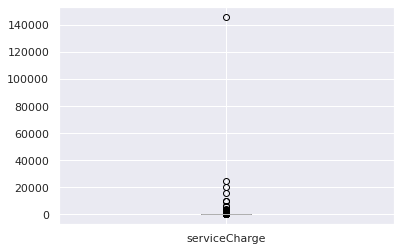

In [122]:
#sns.distplot(df['serviceCharge'])
df.boxplot(column='serviceCharge')

In [123]:
upper_range=df['serviceCharge'].mean()+ 3* df['serviceCharge'].std()
lower_range=df['serviceCharge'].mean()- 3* df['serviceCharge'].std()

indexes=df[(df['serviceCharge']>upper_range)| (df['serviceCharge']<lower_range)].index
df=df.drop(indexes)


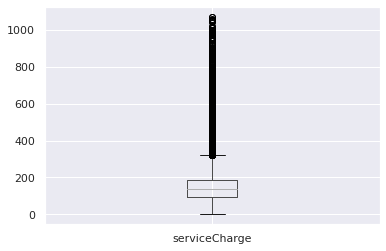

In [124]:
df.boxplot(column='serviceCharge')

In [125]:
for cols in df.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
        upper_range = df[cols].mean() + 3 * df[cols].std()
        lower_range = df[cols].mean() - 3 * df[cols].std()
        
        indexs = df[(df[cols] > upper_range) | (df[cols] < lower_range)].index
        df = df.drop(indexs)

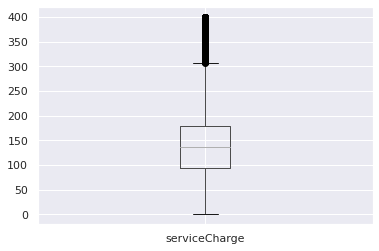

In [126]:
df.boxplot(column='serviceCharge')

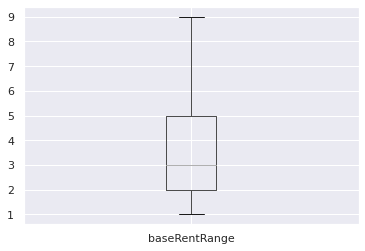

In [127]:
df.boxplot(column='baseRentRange')

In [128]:
df_g=df.copy()

df_g.drop(columns=['livingSpaceRange','street','description','facilities','geo_krs','geo_plz','scoutId','telekomTvOffer','pricetrend','regio3','noRoomsRange','picturecount','geo_bln','date',\
    'houseNumber','streetPlain','firingTypes','yearConstructedRange'],inplace=True)

In [129]:
df_g.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'newlyConst', 'balcony',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'hasKitchen',
       'cellar', 'baseRent', 'livingSpace', 'condition', 'interiorQual',
       'petsAllowed', 'lift', 'baseRentRange', 'typeOfFlat', 'noRooms',
       'thermalChar', 'floor', 'numberOfFloors', 'garden', 'regio2'],
      dtype='object')

fillna numeric data by mean

In [130]:
df_g._get_numeric_data().mean()

serviceCharge          145.125234
newlyConst               0.081832
balcony                  0.615916
telekomUploadSpeed      28.901767
totalRent              797.963030
yearConstructed       1968.157098
hasKitchen               0.331773
cellar                   0.638315
baseRent               615.906664
livingSpace             71.681465
lift                     0.233931
baseRentRange            3.680583
noRooms                  2.589236
thermalChar            112.208959
floor                    2.074324
numberOfFloors           3.518997
garden                   0.189411
dtype: float64

In [131]:
df_g.fillna(df._get_numeric_data().mean(),inplace = True)
df_g.isna().sum()

regio1                     0
serviceCharge              0
heatingType            41602
newlyConst                 0
balcony                    0
telekomUploadSpeed         0
totalRent                  0
yearConstructed            0
hasKitchen                 0
cellar                     0
baseRent                   0
livingSpace                0
condition              62792
interiorQual          103324
petsAllowed           104217
lift                       0
baseRentRange              0
typeOfFlat             33021
noRooms                    0
thermalChar                0
floor                      0
numberOfFloors             0
garden                     0
regio2                     0
dtype: int64

fillna categorical data

In [132]:
for cols in df_g.columns:
    if df_g[cols].dtype == 'object' or df_g[cols].dtype == 'bool':
        print('column : ',cols)
        print(df_g[cols].value_counts().head(1))

column :  regio1
Nordrhein_Westfalen    55838
Name: regio1, dtype: int64
column :  heatingType
central_heating    113673
Name: heatingType, dtype: int64
column :  newlyConst
False    220857
Name: newlyConst, dtype: int64
column :  balcony
True    148153
Name: balcony, dtype: int64
column :  hasKitchen
False    160736
Name: hasKitchen, dtype: int64
column :  cellar
True    153541
Name: cellar, dtype: int64
column :  condition
well_kept    59390
Name: condition, dtype: int64
column :  interiorQual
normal    73084
Name: interiorQual, dtype: int64
column :  petsAllowed
negotiable    81331
Name: petsAllowed, dtype: int64
column :  lift
False    184271
Name: lift, dtype: int64
column :  typeOfFlat
apartment    118459
Name: typeOfFlat, dtype: int64
column :  garden
False    194980
Name: garden, dtype: int64
column :  regio2
Leipzig    12773
Name: regio2, dtype: int64


In [133]:
for cols in df_g.columns:
    if df_g[cols].dtype == 'object' or df_g[cols].dtype == 'bool':
        print('cols : {} , value : {}'.format(cols , df_g[cols].value_counts().head(1).index[0]))
        df_g[cols].fillna(df_g[cols].value_counts().head(1).index[0],inplace = True)

cols : regio1 , value : Nordrhein_Westfalen
cols : heatingType , value : central_heating
cols : newlyConst , value : False
cols : balcony , value : True
cols : hasKitchen , value : False
cols : cellar , value : True
cols : condition , value : well_kept
cols : interiorQual , value : normal
cols : petsAllowed , value : negotiable
cols : lift , value : False
cols : typeOfFlat , value : apartment
cols : garden , value : False
cols : regio2 , value : Leipzig


In [134]:
df_g.isna().sum()

regio1                0
serviceCharge         0
heatingType           0
newlyConst            0
balcony               0
telekomUploadSpeed    0
totalRent             0
yearConstructed       0
hasKitchen            0
cellar                0
baseRent              0
livingSpace           0
condition             0
interiorQual          0
petsAllowed           0
lift                  0
baseRentRange         0
typeOfFlat            0
noRooms               0
thermalChar           0
floor                 0
numberOfFloors        0
garden                0
regio2                0
dtype: int64

In [135]:
df_g.shape

(240541, 24)

In [136]:
df_g.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'newlyConst', 'balcony',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'hasKitchen',
       'cellar', 'baseRent', 'livingSpace', 'condition', 'interiorQual',
       'petsAllowed', 'lift', 'baseRentRange', 'typeOfFlat', 'noRooms',
       'thermalChar', 'floor', 'numberOfFloors', 'garden', 'regio2'],
      dtype='object')

In [137]:
df_g.head()

,regio1,serviceCharge,heatingType,newlyConst,balcony,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,cellar,...,petsAllowed,lift,baseRentRange,typeOfFlat,noRooms,thermalChar,floor,numberOfFloors,garden,regio2
0,Nordrhein_Westfalen,245.00,central_heating,False,False,10.000000,840.000000,1965.0,False,True,...,negotiable,False,4,ground_floor,4.0,181.400000,1.000000,3.000000,True,Dortmund
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,10.000000,907.413955,1871.0,False,False,...,no,False,5,ground_floor,3.0,114.535827,2.124959,3.581273,False,Rhein_Pfalz_Kreis
2,Sachsen,255.00,floor_heating,True,True,2.400000,1300.000000,2019.0,False,True,...,negotiable,True,6,apartment,3.0,114.535827,3.000000,4.000000,False,Dresden
3,Sachsen,58.15,district_heating,False,True,40.000000,907.413955,1964.0,False,False,...,negotiable,False,2,other,3.0,86.000000,3.000000,3.581273,False,Mittelsachsen_Kreis
4,Bremen,138.00,self_contained_central_heating,False,True,28.812074,903.000000,1950.0,False,False,...,negotiable,False,5,apartment,3.0,188.900000,1.000000,3.581273,False,Bremen


categorical data

In [138]:
df_g.petsAllowed.unique()

array(['negotiable', 'no', 'yes'], dtype=object)

In [139]:
df_g['regio1'].value_counts()*100/len(df_g)

Nordrhein_Westfalen       23.213506
Sachsen                   22.305137
Bayern                     7.980344
Sachsen_Anhalt             7.737558
Hessen                     6.498268
Niedersachsen              6.241348
Baden_Württemberg          5.956989
Thüringen                  3.227724
Rheinland_Pfalz            3.143331
Berlin                     2.982028
Brandenburg                2.619928
Mecklenburg_Vorpommern     2.566298
Schleswig_Holstein         2.504355
Hamburg                    1.346548
Bremen                     1.146998
Saarland                   0.529639
Name: regio1, dtype: float64

In [140]:
def edit_regio1(x):
    if x in ['Hamburg','Bremen','Saarland']:
        return 'other'
    else:
        return x
    
df_g['regio1_edit'] = df_g['regio1'].apply(edit_regio1)
df_g = df_g.drop(columns = ['regio1'])

In [141]:
df_g['regio1_edit'].value_counts()*100/len(df_g)

Nordrhein_Westfalen       23.213506
Sachsen                   22.305137
Bayern                     7.980344
Sachsen_Anhalt             7.737558
Hessen                     6.498268
Niedersachsen              6.241348
Baden_Württemberg          5.956989
Thüringen                  3.227724
Rheinland_Pfalz            3.143331
other                      3.023185
Berlin                     2.982028
Brandenburg                2.619928
Mecklenburg_Vorpommern     2.566298
Schleswig_Holstein         2.504355
Name: regio1_edit, dtype: float64

In [142]:
df_g.columns

Index(['serviceCharge', 'heatingType', 'newlyConst', 'balcony',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'hasKitchen',
       'cellar', 'baseRent', 'livingSpace', 'condition', 'interiorQual',
       'petsAllowed', 'lift', 'baseRentRange', 'typeOfFlat', 'noRooms',
       'thermalChar', 'floor', 'numberOfFloors', 'garden', 'regio2',
       'regio1_edit'],
      dtype='object')

In [143]:
df_g.shape

(240541, 24)

# Data Visualization

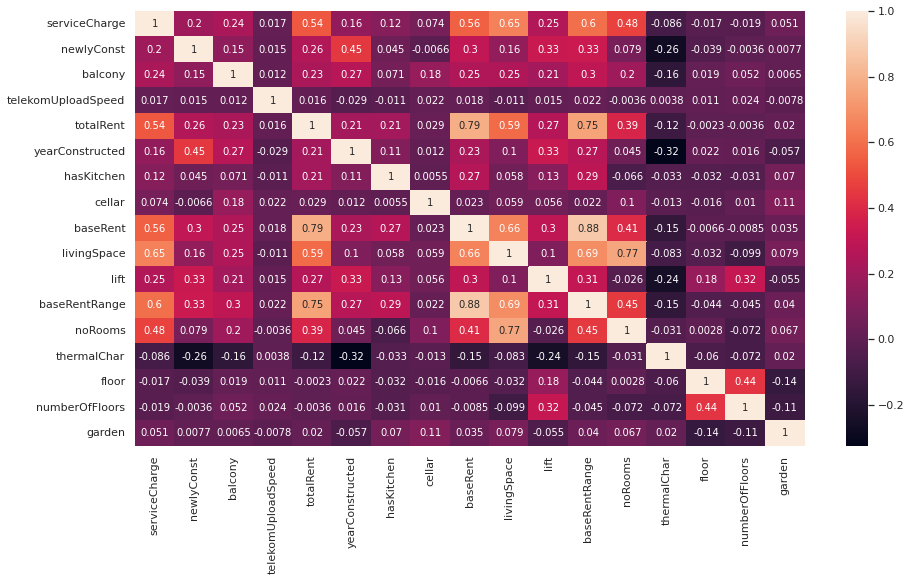

In [144]:
corr = df_g.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

In [145]:
df_g.regio1_edit.value_counts().iloc[:10]

Nordrhein_Westfalen    55838
Sachsen                53653
Bayern                 19196
Sachsen_Anhalt         18612
Hessen                 15631
Niedersachsen          15013
Baden_Württemberg      14329
Thüringen               7764
Rheinland_Pfalz         7561
other                   7272
Name: regio1_edit, dtype: int64

In [146]:
#df_g.regio2.value_counts().iloc[:10]

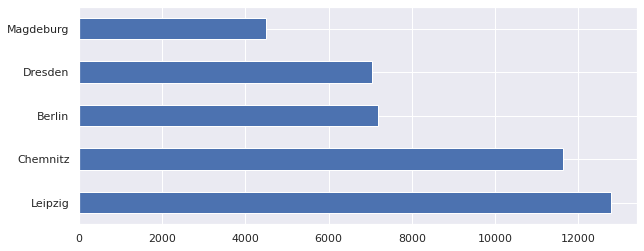

In [147]:
plt.figure(figsize=(10,4))
df_g.regio2.value_counts().iloc[:5].plot(kind = 'barh')

In [148]:
df_g.columns

Index(['serviceCharge', 'heatingType', 'newlyConst', 'balcony',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'hasKitchen',
       'cellar', 'baseRent', 'livingSpace', 'condition', 'interiorQual',
       'petsAllowed', 'lift', 'baseRentRange', 'typeOfFlat', 'noRooms',
       'thermalChar', 'floor', 'numberOfFloors', 'garden', 'regio2',
       'regio1_edit'],
      dtype='object')

In [149]:
df_city= df_g.groupby(['regio1_edit','regio2'])['baseRent'].mean().reset_index()

In [150]:
top_city_each= df_city.loc[df_city.groupby('regio1_edit')['baseRent'].idxmax()].sort_values(by='baseRent',ascending=False)
top_city_each

,regio1_edit,regio2,baseRent
102,Bayern,München,1575.775569
38,Baden_Württemberg,Stuttgart,1296.229845
162,Hessen,Frankfurt_am_Main,1272.569747
412,other,Hamburg,1083.463927
140,Berlin,Berlin,1018.668882
332,Rheinland_Pfalz,Speyer,996.754028
262,Nordrhein_Westfalen,Düsseldorf,966.343633
153,Brandenburg,Potsdam,861.885913
221,Niedersachsen,Harburg_Kreis,808.518074
386,Schleswig_Holstein,Stormarn_Kreis,805.631480


Text(0, 0.5, 'baseRent')

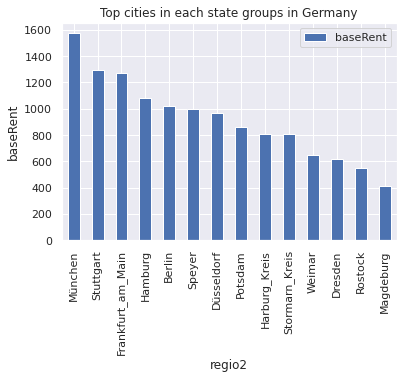

In [151]:
top_city_each.plot.bar(x='regio2', rot=90, title='Top cities in each state groups in Germany')
plt.xlabel('regio2')
plt.ylabel('baseRent')

In [152]:
df_flat= df_g.groupby(['typeOfFlat','regio1_edit'])['baseRent'].mean().reset_index()

In [153]:
top_flat_type= df_flat.loc[df_flat.groupby('typeOfFlat')['baseRent'].idxmax()].sort_values(by='baseRent',ascending=False)
top_flat_type

,typeOfFlat,regio1_edit,baseRent
86,penthouse,Berlin,1903.851778
44,loft,Berlin,1574.337931
58,maisonette,Berlin,1415.626783
114,roof_storey,Berlin,1315.278607
128,terraced_flat,Berlin,1273.992258
72,other,Berlin,1040.130694
2,apartment,Berlin,962.908263
16,ground_floor,Berlin,929.009412
102,raised_ground_floor,Hessen,920.475919
41,half_basement,other,718.684186


Text(0, 0.5, 'baseRent')

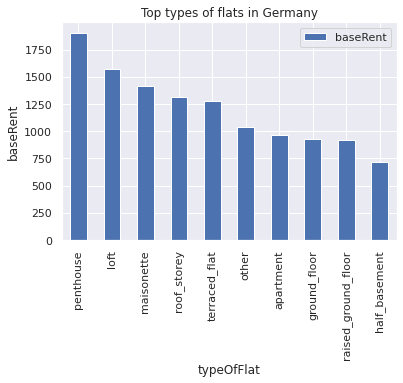

In [154]:
top_flat_type.plot.bar(x='typeOfFlat', rot=90, title='Top types of flats in Germany')
plt.xlabel('typeOfFlat')
plt.ylabel('baseRent')

Text(0.5, 1.0, 'livingSpace-totalRent')

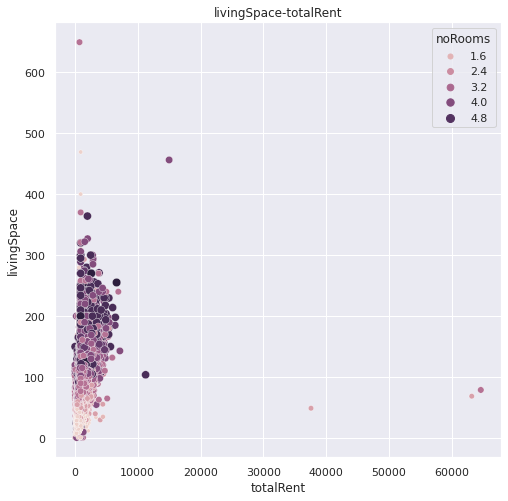

In [155]:
sns.set(rc={"figure.figsize": (8, 8)})
ax= sns.scatterplot(data=df_g, x="totalRent", y="livingSpace",hue='noRooms', size='noRooms')
ax.set_title('livingSpace-totalRent')

In [156]:
df_g.typeOfFlat.unique()

array(['ground_floor', 'apartment', 'other', 'roof_storey',
       'raised_ground_floor', 'half_basement', 'terraced_flat',
       'penthouse', 'maisonette', 'loft'], dtype=object)

In [157]:
df_g.typeOfFlat.value_counts()

apartment              151480
roof_storey             30815
ground_floor            28714
other                    8547
maisonette               7617
raised_ground_floor      5004
terraced_flat            2918
penthouse                2850
half_basement            1807
loft                      789
Name: typeOfFlat, dtype: int64

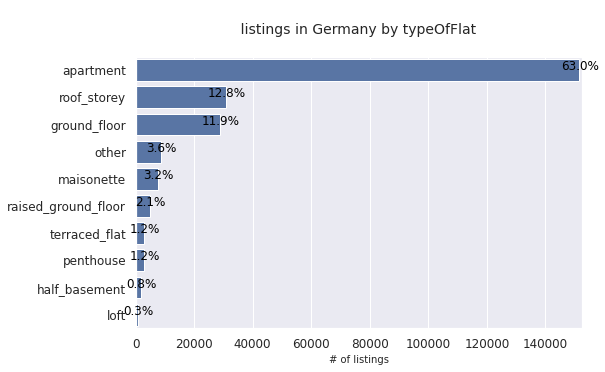

In [158]:
plt.figure(figsize = (8,5))
basecolor = sns.color_palette()[0]
sns.countplot(data = df_g, y = 'typeOfFlat', color = basecolor, 
              order = df_g['typeOfFlat'].value_counts().index)
plt.ylabel('')
plt.xlabel('# of listings', fontsize = 10)
plt.title('\n listings in Germany by typeOfFlat \n', fontsize = 14)

plt.xticks(fontsize =12)
plt.yticks(fontsize =12)

# add annotations
n_points = df_g.shape[0]
cat_counts = df_g['typeOfFlat'].value_counts()
locs, labels = plt.yticks() # get the current tick locations and labels
plt.xlim((0,cat_counts.max()+1000))

# loop 
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(count+200, loc, pct_string, ha = 'center', color = 'black', fontsize = 12)

# code credit : https://www.geeksforgeeks.org/ for adding percentage to bar chart    


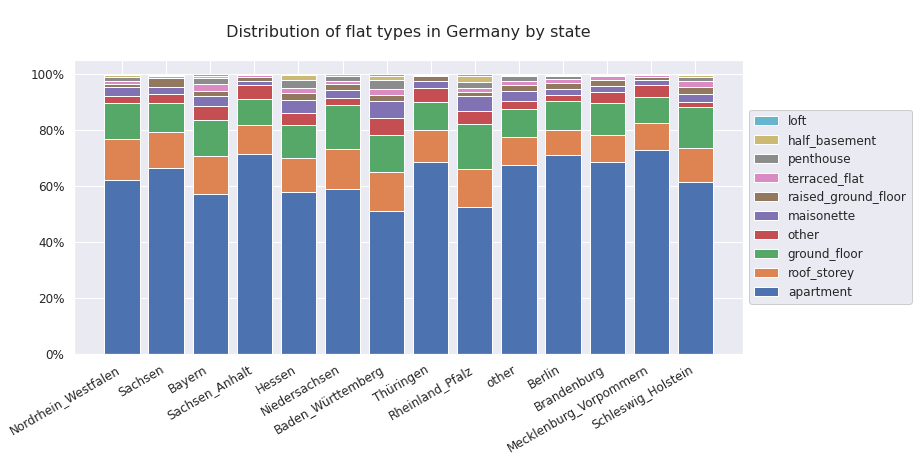

In [159]:

type_Of_Flat = pd.Series(df_g['typeOfFlat'].value_counts().index)
federal_state = pd.Series(df_g['regio1_edit'].value_counts().index)

plot_elements = [] # for storing references to plot elements
baselines = np.zeros(len(federal_state)) # stores the baseline for the next category plot
nb_counts = df_g['regio1_edit'].value_counts()

fig, ax = plt.subplots(figsize=(12,6))
fig.autofmt_xdate()   # rotate text on x-axis

# for each second-variable category:
for i in range(len(type_Of_Flat)):
    # isolate the counts of the first category,
    rt = type_Of_Flat[i]
    inner_counts = df_g[df_g['typeOfFlat'] == rt]['regio1_edit'].value_counts()
    inner_props = inner_counts / nb_counts
     
    
    inner_props[inner_props.isnull()] = 0
    
    # then plot those counts on top of the accumulated baseline
    bars = plt.bar(x = np.arange(len(federal_state)),
                   height = inner_props[federal_state],
                   bottom = baselines)
    plot_elements.append(bars)
    baselines += inner_props[federal_state]

plt.title('\n Distribution of flat types in Germany by state \n', fontsize = 16)
plt.xticks(np.arange(len(federal_state)), federal_state)
yt = np.arange(0, 1.1, .2)
plt.yticks(yt, ['{:1.0f}%'.format(100*x) for x in yt])
plt.legend(reversed(plot_elements), reversed(type_Of_Flat), framealpha = 1,
           bbox_to_anchor = (1, 0.5), loc = 6, fontsize = 12);

ax.tick_params(axis='both', labelsize=12)

# code credit by : stackoverflow.com

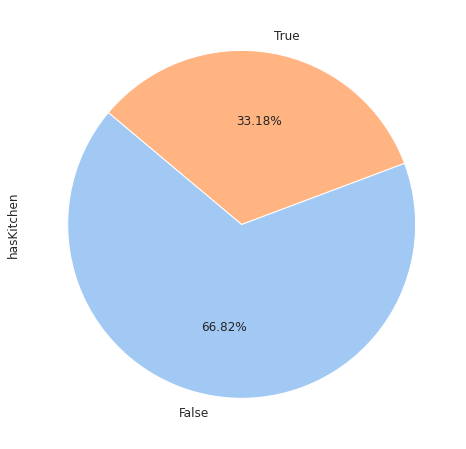

In [160]:
colors = sns.color_palette('pastel')[0:5]
#plt.figure(figsize=(10,8))
df_g['hasKitchen'].value_counts().plot(kind='pie',  autopct='%1.2f%%', startangle=140, fontsize=12, colors = colors)

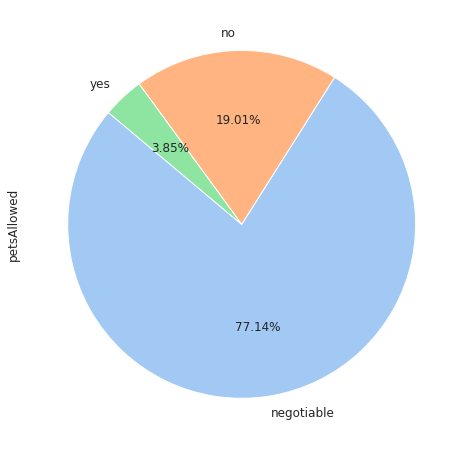

In [161]:
df_g['petsAllowed'].value_counts().plot(kind='pie',  autopct='%1.2f%%', startangle=140, fontsize=12, colors = colors)


In [162]:
df_g.columns

Index(['serviceCharge', 'heatingType', 'newlyConst', 'balcony',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'hasKitchen',
       'cellar', 'baseRent', 'livingSpace', 'condition', 'interiorQual',
       'petsAllowed', 'lift', 'baseRentRange', 'typeOfFlat', 'noRooms',
       'thermalChar', 'floor', 'numberOfFloors', 'garden', 'regio2',
       'regio1_edit'],
      dtype='object')

In [163]:
df_prices = df_g.groupby("hasKitchen").agg([np.mean, np.std])

In [164]:
prices = df_prices['baseRent']
 
# checking for results
prices.head()

,mean,std
hasKitchen,,
False,535.433709,367.265161
True,777.987999,489.052689


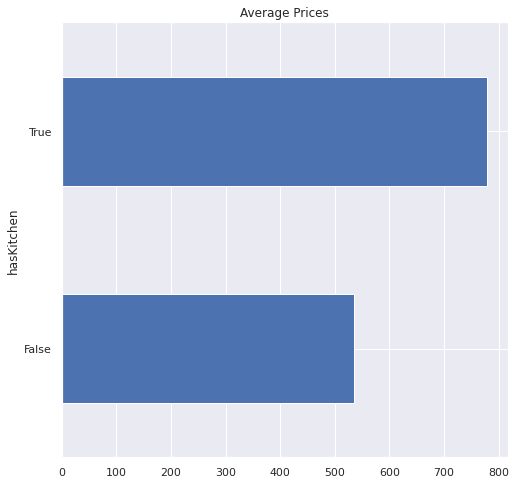

In [165]:
prices.plot(kind = "barh", y = "mean", legend = False,
            title = "Average Prices")

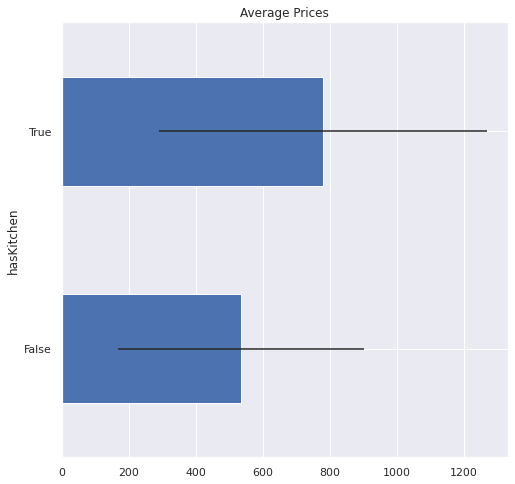

In [166]:
prices.plot(kind = "barh", y = "mean", legend = False,
            title = "Average Prices", xerr = "std")

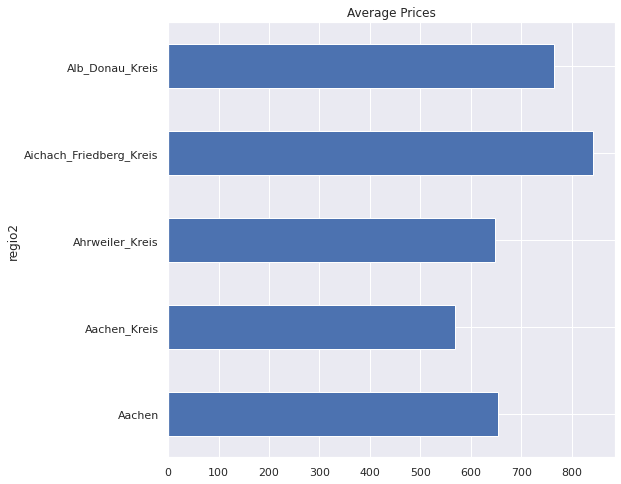

In [167]:
df_prices_city = df_g.groupby("regio2").agg([np.mean, np.std])
prices_city = df_prices_city['baseRent']
prices_city.iloc[:5].plot(kind = "barh", y = "mean", legend = False,
            title = "Average Prices")

In [168]:
df_g=df_g.drop('regio2',axis=1)

# Feature Engineering

## Reduce unique values

In [169]:
df_g.telekomUploadSpeed.unique()

array([10.        ,  2.4       , 40.        , 28.81207378,  5.        ,
        1.        ,  4.        ])

Reduce the unique values in categorical columns

In [170]:
df_g.loc[df_g["condition"] == 'first_time_use', "condition"] = 'new'
df_g.loc[df_g["condition"] == 'first_time_use_after_refurbishment', "condition"] = 'new'
df_g.loc[df_g["condition"] == 'fully_renovated', "condition"] = 'new'
df_g.loc[df_g["condition"] == 'mint_condition', "condition"] = 'new'


df_g.loc[df_g["condition"] == 'well_kept', "condition"] = 'mid_class'
df_g.loc[df_g["condition"] == 'refurbished', "condition"] = 'mid_class'
df_g.loc[df_g["condition"] == 'modernized', "condition"] = 'mid_class'


df_g.loc[df_g["condition"] == 'negotiable', "condition"] = 'old'
df_g.loc[df_g["condition"] == 'need_of_renovation', "condition"] = 'old'
df_g.loc[df_g["condition"] == 'ripe_for_demolition', "condition"] = 'old'



In [171]:
list(df_g['heatingType'].value_counts().tail(8).index)

['oil_heating',
 'heat_pump',
 'combined_heat_and_power_plant',
 'night_storage_heater',
 'wood_pellet_heating',
 'electric_heating',
 'stove_heating',
 'solar_heating']

In [172]:
others = list(df_g['heatingType'].value_counts().tail(8).index)
def edit_heating(x):
    if x in others:
        return 'other'
    else:
        return x

df_g['heatingType_reduced'] = df_g['heatingType'].apply(edit_heating)
df_g = df_g.drop(columns = ['heatingType'])
df_g['heatingType_reduced'].value_counts()*100 / len(df_g)

central_heating                   64.552405
district_heating                   9.448285
gas_heating                        7.568772
self_contained_central_heating     6.735650
floor_heating                      6.598875
other                              5.096013
Name: heatingType_reduced, dtype: float64

##Normalization

In [173]:
scaler = MinMaxScaler()
df_g[['livingSpace','noRooms']] = scaler.fit_transform(df_g[['livingSpace','noRooms']])


## Encoding

encoding categorical variable 


boolean types:

In [174]:
# checking features
cat_bol = df_g.select_dtypes(include=bool).keys()
# display variabels
cat_bol

Index(['newlyConst', 'balcony', 'hasKitchen', 'cellar', 'lift', 'garden'], dtype='object')

In [175]:
enc_cat_bool = pd.get_dummies(df_g[cat_bol])
enc_cat_bool.head() 

,newlyConst,balcony,hasKitchen,cellar,lift,garden
0,False,False,False,True,False,True
1,False,True,False,False,False,False
2,True,True,False,True,True,False
3,False,True,False,False,False,False
4,False,True,False,False,False,False


In [176]:
df_g = pd.concat([df_g, enc_cat_bool], axis=1)
df_g.head()

,serviceCharge,newlyConst,balcony,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,cellar,baseRent,livingSpace,...,numberOfFloors,garden,regio1_edit,heatingType_reduced,newlyConst,balcony,hasKitchen,cellar,lift,garden
0,245.00,False,False,10.000000,840.000000,1965.0,False,True,595.0,0.131173,...,3.000000,True,Nordrhein_Westfalen,central_heating,False,False,False,True,False,True
1,134.00,False,True,10.000000,907.413955,1871.0,False,False,800.0,0.135802,...,3.581273,False,Rheinland_Pfalz,self_contained_central_heating,False,True,False,False,False,False
2,255.00,True,True,2.400000,1300.000000,2019.0,False,True,965.0,0.127778,...,4.000000,False,Sachsen,floor_heating,True,True,False,True,True,False
3,58.15,False,True,40.000000,907.413955,1964.0,False,False,343.0,0.088194,...,3.581273,False,Sachsen,district_heating,False,True,False,False,False,False
4,138.00,False,True,28.812074,903.000000,1950.0,False,False,765.0,0.129583,...,3.581273,False,other,self_contained_central_heating,False,True,False,False,False,False


In [177]:
df_g = df_g.drop(columns=cat_bol)
df_g.head()

,serviceCharge,telekomUploadSpeed,totalRent,yearConstructed,baseRent,livingSpace,condition,interiorQual,petsAllowed,baseRentRange,typeOfFlat,noRooms,thermalChar,floor,numberOfFloors,regio1_edit,heatingType_reduced
0,245.00,10.000000,840.000000,1965.0,595.0,0.131173,mid_class,normal,negotiable,4,ground_floor,0.666667,181.400000,1.000000,3.000000,Nordrhein_Westfalen,central_heating
1,134.00,10.000000,907.413955,1871.0,800.0,0.135802,mid_class,normal,no,5,ground_floor,0.444444,114.535827,2.124959,3.581273,Rheinland_Pfalz,self_contained_central_heating
2,255.00,2.400000,1300.000000,2019.0,965.0,0.127778,new,sophisticated,negotiable,6,apartment,0.444444,114.535827,3.000000,4.000000,Sachsen,floor_heating
3,58.15,40.000000,907.413955,1964.0,343.0,0.088194,mid_class,normal,negotiable,2,other,0.444444,86.000000,3.000000,3.581273,Sachsen,district_heating
4,138.00,28.812074,903.000000,1950.0,765.0,0.129583,mid_class,normal,negotiable,5,apartment,0.444444,188.900000,1.000000,3.581273,other,self_contained_central_heating


object types:

In [178]:
# checking features
cat = df_g.select_dtypes(include='O').keys()
# display variabels
cat

Index(['condition', 'interiorQual', 'petsAllowed', 'typeOfFlat', 'regio1_edit',
       'heatingType_reduced'],
      dtype='object')

In [179]:
for each in df_g[cat]:
  print(each,df_g[each].nunique())

condition 3
interiorQual 4
petsAllowed 3
typeOfFlat 10
regio1_edit 14
heatingType_reduced 6


In [180]:
new_df=df_g[cat]
new_df.columns

Index(['condition', 'interiorQual', 'petsAllowed', 'typeOfFlat', 'regio1_edit',
       'heatingType_reduced'],
      dtype='object')

In [181]:
# finding the top 10 categories
new_df.regio1_edit .value_counts().sort_values(ascending=False).head(10)

Nordrhein_Westfalen    55838
Sachsen                53653
Bayern                 19196
Sachsen_Anhalt         18612
Hessen                 15631
Niedersachsen          15013
Baden_Württemberg      14329
Thüringen               7764
Rheinland_Pfalz         7561
other                   7272
Name: regio1_edit, dtype: int64

In [182]:
# make list with top 10 variables
top_10 = [x for x in new_df.regio1_edit.value_counts().sort_values(ascending=False).head(10).index]
top_10

['Nordrhein_Westfalen',
 'Sachsen',
 'Bayern',
 'Sachsen_Anhalt',
 'Hessen',
 'Niedersachsen',
 'Baden_Württemberg',
 'Thüringen',
 'Rheinland_Pfalz',
 'other']

In [183]:
enc_cat = pd.get_dummies(df_g[cat])
enc_cat.head() 

,condition_mid_class,condition_new,condition_old,interiorQual_luxury,interiorQual_normal,interiorQual_simple,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,...,regio1_edit_Sachsen_Anhalt,regio1_edit_Schleswig_Holstein,regio1_edit_Thüringen,regio1_edit_other,heatingType_reduced_central_heating,heatingType_reduced_district_heating,heatingType_reduced_floor_heating,heatingType_reduced_gas_heating,heatingType_reduced_other,heatingType_reduced_self_contained_central_heating
0,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [184]:
df_g = pd.concat([df_g, enc_cat], axis=1)
df_g.head()

,serviceCharge,telekomUploadSpeed,totalRent,yearConstructed,baseRent,livingSpace,condition,interiorQual,petsAllowed,baseRentRange,...,regio1_edit_Sachsen_Anhalt,regio1_edit_Schleswig_Holstein,regio1_edit_Thüringen,regio1_edit_other,heatingType_reduced_central_heating,heatingType_reduced_district_heating,heatingType_reduced_floor_heating,heatingType_reduced_gas_heating,heatingType_reduced_other,heatingType_reduced_self_contained_central_heating
0,245.00,10.000000,840.000000,1965.0,595.0,0.131173,mid_class,normal,negotiable,4,...,0,0,0,0,1,0,0,0,0,0
1,134.00,10.000000,907.413955,1871.0,800.0,0.135802,mid_class,normal,no,5,...,0,0,0,0,0,0,0,0,0,1
2,255.00,2.400000,1300.000000,2019.0,965.0,0.127778,new,sophisticated,negotiable,6,...,0,0,0,0,0,0,1,0,0,0
3,58.15,40.000000,907.413955,1964.0,343.0,0.088194,mid_class,normal,negotiable,2,...,0,0,0,0,0,1,0,0,0,0
4,138.00,28.812074,903.000000,1950.0,765.0,0.129583,mid_class,normal,negotiable,5,...,0,0,0,1,0,0,0,0,0,1


In [185]:
df_g = df_g.drop(columns=cat)
df_g.head()

,serviceCharge,telekomUploadSpeed,totalRent,yearConstructed,baseRent,livingSpace,baseRentRange,noRooms,thermalChar,floor,...,regio1_edit_Sachsen_Anhalt,regio1_edit_Schleswig_Holstein,regio1_edit_Thüringen,regio1_edit_other,heatingType_reduced_central_heating,heatingType_reduced_district_heating,heatingType_reduced_floor_heating,heatingType_reduced_gas_heating,heatingType_reduced_other,heatingType_reduced_self_contained_central_heating
0,245.00,10.000000,840.000000,1965.0,595.0,0.131173,4,0.666667,181.400000,1.000000,...,0,0,0,0,1,0,0,0,0,0
1,134.00,10.000000,907.413955,1871.0,800.0,0.135802,5,0.444444,114.535827,2.124959,...,0,0,0,0,0,0,0,0,0,1
2,255.00,2.400000,1300.000000,2019.0,965.0,0.127778,6,0.444444,114.535827,3.000000,...,0,0,0,0,0,0,1,0,0,0
3,58.15,40.000000,907.413955,1964.0,343.0,0.088194,2,0.444444,86.000000,3.000000,...,0,0,0,0,0,1,0,0,0,0
4,138.00,28.812074,903.000000,1950.0,765.0,0.129583,5,0.444444,188.900000,1.000000,...,0,0,0,1,0,0,0,0,0,1


#Regression

implement regression model with three features:
* serviceCharge
* heatingType
* telekomUploadSpeed

calculate MSE without using libraries

## MSE from Scratch using Numpy 

calculating MSE on linear regression model without using library

In [95]:
class LinearRegressionn:
    def __init__(self, x , y):
        self.data = x
        self.label = y
        self.m = 0
        self.c = 0
        self.n = len(x)
        
    def fit(self , epochs , lr):
        
        #Implementing Gradient Descent
        for i in range(epochs):
            y_pred = self.m * self.data + self.c
            
            #Calculating derivatives w.r.t Parameters
            D_m = (-2/self.n)*sum(self.data * (self.label - y_pred))
            D_c = (-1/self.n)*sum(self.label-y_pred)
            
            #Updating Parameters
            self.m = self.m - lr * D_m
            self.c = self.c - lr * D_c
            
    def predict(self , inp):
        y_pred = self.m * inp + self.c 
        return y_pred
    
    def mse(self):
        metric = sum((self.label - self.predict(self.data))**2)/self.n
        return metric
    
    def mae(self):
        metric = sum(abs(self.label - self.predict(self.data)))/self.n
        return metric
        

In [96]:
X = df_g[['serviceCharge',
          'heatingType_reduced_central_heating',
          'heatingType_reduced_district_heating',
          'heatingType_reduced_floor_heating', 'heatingType_reduced_gas_heating',
          'heatingType_reduced_other',
          'heatingType_reduced_self_contained_central_heating',
          'telekomUploadSpeed'
          ]]
y = df_g['baseRent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [90]:
#Creating the class object
regressor = LinearRegressionn(X_train,y_train)

#Training the model with .fit method
regressor.fit(1000 , 0.0001) # epochs-1000 , learning_rate - 0.0001

#Prediciting the values
y_pred = regressor.predict(X_test)

#Plotting the results
plt.figure(figsize = (10,6))
plt.scatter(X_train,y_train , color = 'green')
plt.plot(X_test , y_pred , color = 'k' , lw = 3)
plt.xlabel('x' , size = 20)
plt.ylabel('y', size = 20)
plt.show()

##MSE using scikit – learn 

calculating MSE on linear regression model using scikit – learn library

In [186]:
df_g.columns

Index(['serviceCharge', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'baseRent', 'livingSpace', 'baseRentRange', 'noRooms', 'thermalChar',
       'floor', 'numberOfFloors', 'condition_mid_class', 'condition_new',
       'condition_old', 'interiorQual_luxury', 'interiorQual_normal',
       'interiorQual_simple', 'interiorQual_sophisticated',
       'petsAllowed_negotiable', 'petsAllowed_no', 'petsAllowed_yes',
       'typeOfFlat_apartment', 'typeOfFlat_ground_floor',
       'typeOfFlat_half_basement', 'typeOfFlat_loft', 'typeOfFlat_maisonette',
       'typeOfFlat_other', 'typeOfFlat_penthouse',
       'typeOfFlat_raised_ground_floor', 'typeOfFlat_roof_storey',
       'typeOfFlat_terraced_flat', 'regio1_edit_Baden_Württemberg',
       'regio1_edit_Bayern', 'regio1_edit_Berlin', 'regio1_edit_Brandenburg',
       'regio1_edit_Hessen', 'regio1_edit_Mecklenburg_Vorpommern',
       'regio1_edit_Niedersachsen', 'regio1_edit_Nordrhein_Westfalen',
       'regio1_edit_Rheinland_Pf

In [187]:
df_g.shape

(240541, 51)

In [188]:
l_reg = LinearRegression()
X = df_g[['serviceCharge',
          'heatingType_reduced_central_heating',
          'heatingType_reduced_district_heating',
          'heatingType_reduced_floor_heating', 'heatingType_reduced_gas_heating',
          'heatingType_reduced_other',
          'heatingType_reduced_self_contained_central_heating',
          'telekomUploadSpeed'
          ]]
y = df_g['baseRent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
l_reg.fit(X_train,y_train)

LinearRegression()

In [189]:
predicts = l_reg.predict(X_test)
print("Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, predicts)))
print("R2 Score: ", r2_score(y_test,predicts) * 100)
print("Mean Absolute Error: ", mean_absolute_error(y_test,predicts))
print("Mean Squareroot Error: ", mean_squared_error(y_test,predicts))

Mean Squared Error:  325.5957479814876
R2 Score:  36.38404885075125
Mean Absolute Error:  217.3606940122674
Mean Squareroot Error:  106012.59110362438


In [190]:
#Actual Vs Predicted for Linear Regression
lr_pred_df = pd.DataFrame({
        'actual_values': np.array(y_test).flatten(),
        'predicted_values': predicts.flatten()}).head(20)

print(lr_pred_df.head(5))


   actual_values  predicted_values
0         1500.0       1492.977274
1          265.0        274.702117
2          350.0        562.369452
3          999.0        877.463288
4          555.0        731.742703


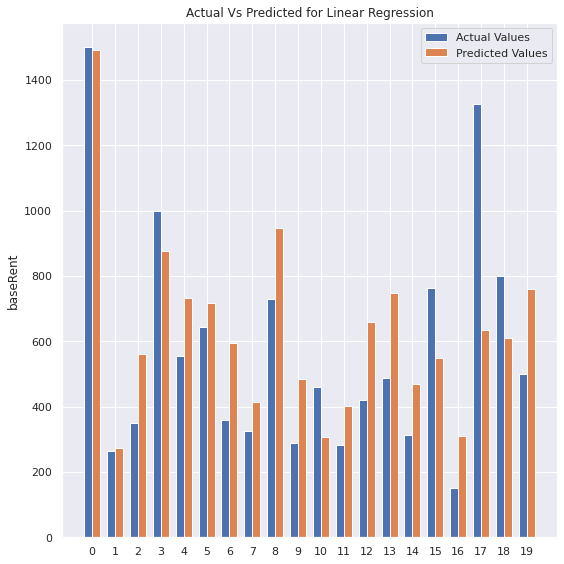

In [191]:
x = lr_pred_df.index
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lr_pred_df.actual_values, width, label='Actual Values')
rects2 = ax.bar(x + width/2, lr_pred_df.predicted_values, width, label='Predicted Values')
ax.set_ylabel('baseRent')
ax.set_title('Actual Vs Predicted for Linear Regression')
ax.set_xticks(x)
ax.legend()
fig.tight_layout()
plt.show()

#Ridge Regression

In [192]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [193]:
X = df_g[['serviceCharge',
          'heatingType_reduced_central_heating',
          'heatingType_reduced_district_heating',
          'heatingType_reduced_floor_heating', 'heatingType_reduced_gas_heating',
          'heatingType_reduced_other',
          'heatingType_reduced_self_contained_central_heating',
          'telekomUploadSpeed'
          ]]
y = df_g['baseRent']

In [194]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 8)

Text(0, 0.5, 'weights')

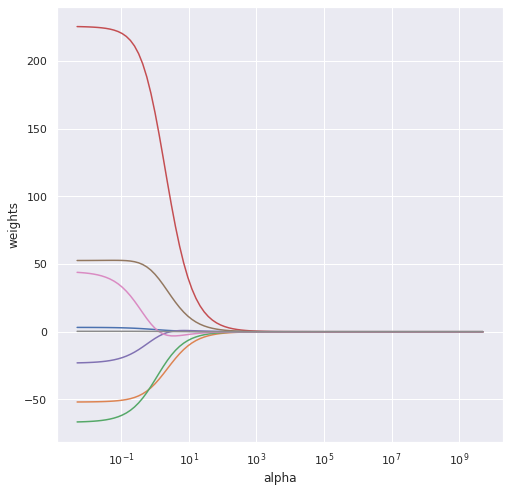

In [195]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [197]:
ridge2 = Ridge(alpha = 4, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2))          # Calculate the test MSE

serviceCharge                                          0.661145
heatingType_reduced_central_heating                  -20.015538
heatingType_reduced_district_heating                 -13.836875
heatingType_reduced_floor_heating                     79.255929
heatingType_reduced_gas_heating                        0.865946
heatingType_reduced_other                             21.419725
heatingType_reduced_self_contained_central_heating    -3.594618
telekomUploadSpeed                                     0.089299
dtype: float64
142306.4742627567


In [198]:
ridge3 = Ridge(alpha = 10**10, normalize = True)
ridge3.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge3.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred3))          # Calculate the test MSE

serviceCharge                                         3.376561e-10
heatingType_reduced_central_heating                  -1.204226e-08
heatingType_reduced_district_heating                 -6.472936e-09
heatingType_reduced_floor_heating                     4.476202e-08
heatingType_reduced_gas_heating                       1.682171e-09
heatingType_reduced_other                             1.273691e-08
heatingType_reduced_self_contained_central_heating   -2.987697e-09
telekomUploadSpeed                                    4.888864e-11
dtype: float64
166667.595434925


In [199]:
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred = ridge2.predict(X_test)            # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred))           # Calculate the test MSE

serviceCharge                                           3.196304
heatingType_reduced_central_heating                  -145.537924
heatingType_reduced_district_heating                 -159.632525
heatingType_reduced_floor_heating                     136.251088
heatingType_reduced_gas_heating                      -115.402253
heatingType_reduced_other                             -42.318390
heatingType_reduced_self_contained_central_heating    -50.696845
telekomUploadSpeed                                      0.254204
dtype: float64
106012.5911036244


In [200]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.005

In [201]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

106011.92540581664

In [202]:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

serviceCharge                                           3.180414
heatingType_reduced_central_heating                   -51.939061
heatingType_reduced_district_heating                  -66.683546
heatingType_reduced_floor_heating                     225.514499
heatingType_reduced_gas_heating                       -23.027815
heatingType_reduced_other                              52.628019
heatingType_reduced_self_contained_central_heating     43.877040
telekomUploadSpeed                                      0.289375
dtype: float64

#Lasso

Text(0, 0.5, 'weights')

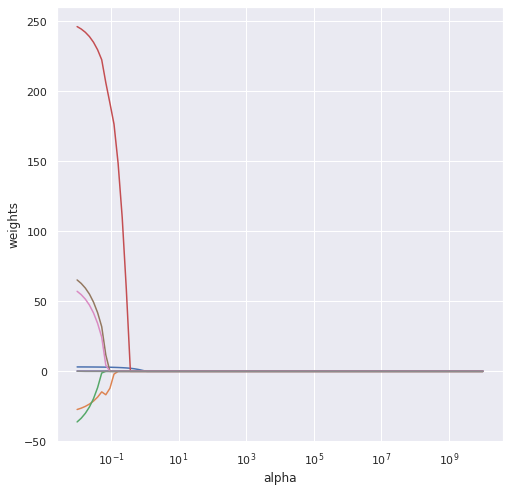

In [203]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [204]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

106014.0525569379

In [205]:
pd.Series(lasso.coef_, index=X.columns)

serviceCharge                                           3.193424
heatingType_reduced_central_heating                   -29.939476
heatingType_reduced_district_heating                  -43.462931
heatingType_reduced_floor_heating                     250.943639
heatingType_reduced_gas_heating                         0.000000
heatingType_reduced_other                              72.123659
heatingType_reduced_self_contained_central_heating     63.777244
telekomUploadSpeed                                      0.238257
dtype: float64